# SoftMax for Image Classification
## Make a SoftMax program for image classification using MNIST digits dataset (from `sklearn.datasets`or from `keras.datasets.mnist`)

epoch 0: loss = 2.2824
epoch 20: loss = 1.1820
epoch 40: loss = 0.8743
epoch 60: loss = 0.7380
epoch 80: loss = 0.6600
epoch 100: loss = 0.6088
epoch 120: loss = 0.5721
epoch 140: loss = 0.5443
epoch 160: loss = 0.5223
epoch 180: loss = 0.5045

Test Accuracy: 88.57%


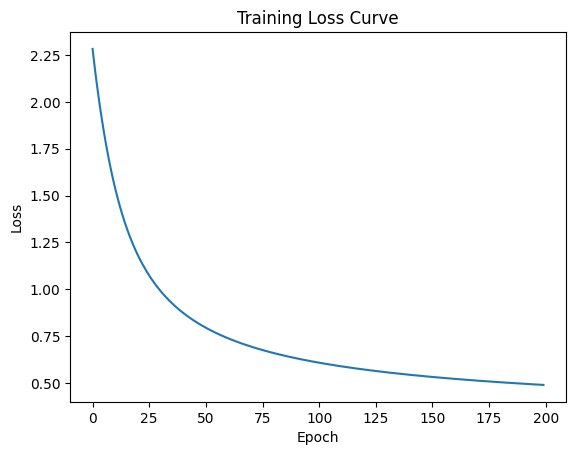

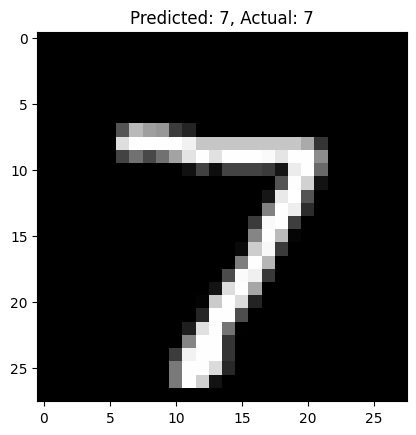

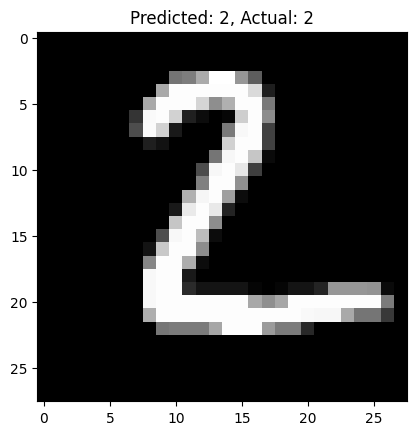

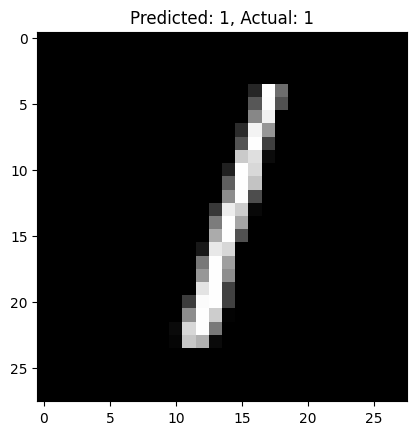

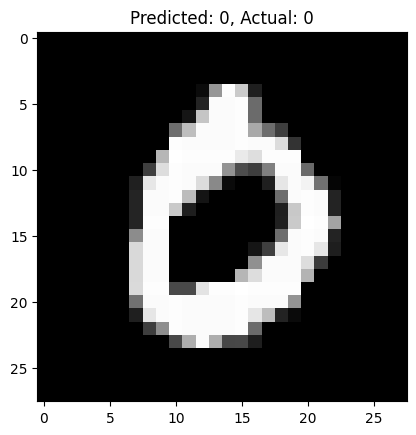

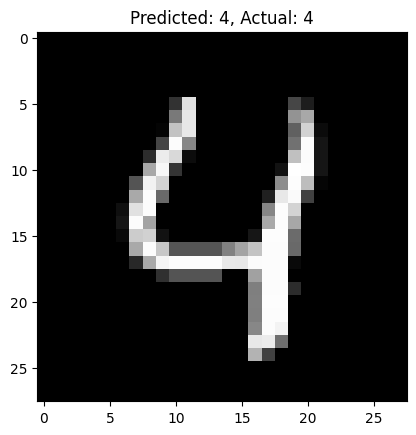

In [3]:
# softmax regression for mnist image classification
# Andy Nguyen
# SWE3050-41
# SKKU
# Group Activity 5, Group 11

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# 1. load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. preprocess data
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0

# one-hot encode labels
encoder = OneHotEncoder(sparse_output=False)
y_train_oh = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_oh = encoder.transform(y_test.reshape(-1, 1))

# 3. initialize parameters
n_features = x_train.shape[1]
n_classes = 10
W = np.random.randn(n_features, n_classes) * 0.01
b = np.zeros((1, n_classes))

# 4. define softmax and loss
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def compute_loss(y_true, y_pred):
    m = y_true.shape[0]
    return -np.sum(y_true * np.log(y_pred + 1e-8)) / m

# 5. training using gradient descent
lr = 0.1
epochs = 200
losses = []

for i in range(epochs):
    # forward pass
    z = np.dot(x_train, W) + b
    y_pred = softmax(z)

    # compute loss
    loss = compute_loss(y_train_oh, y_pred)
    losses.append(loss)

    # backward pass
    m = x_train.shape[0]
    dW = (1/m) * np.dot(x_train.T, (y_pred - y_train_oh))
    db = (1/m) * np.sum(y_pred - y_train_oh, axis=0, keepdims=True)

    # update parameters
    W -= lr * dW
    b -= lr * db

    if i % 20 == 0:
        print(f"epoch {i}: loss = {loss:.4f}")

# 6. evaluate on test data
z_test = np.dot(x_test, W) + b
y_test_pred = softmax(z_test)
y_pred_classes = np.argmax(y_test_pred, axis=1)
accuracy = np.mean(y_pred_classes == y_test)

print(f"\nTest Accuracy: {accuracy * 100:.2f}%")

# 7. plot training loss curve
plt.plot(losses)
plt.title("Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# 8. visualize sample predictions
for i in range(5):
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Predicted: {y_pred_classes[i]}, Actual: {y_test[i]}")
    plt.show()
